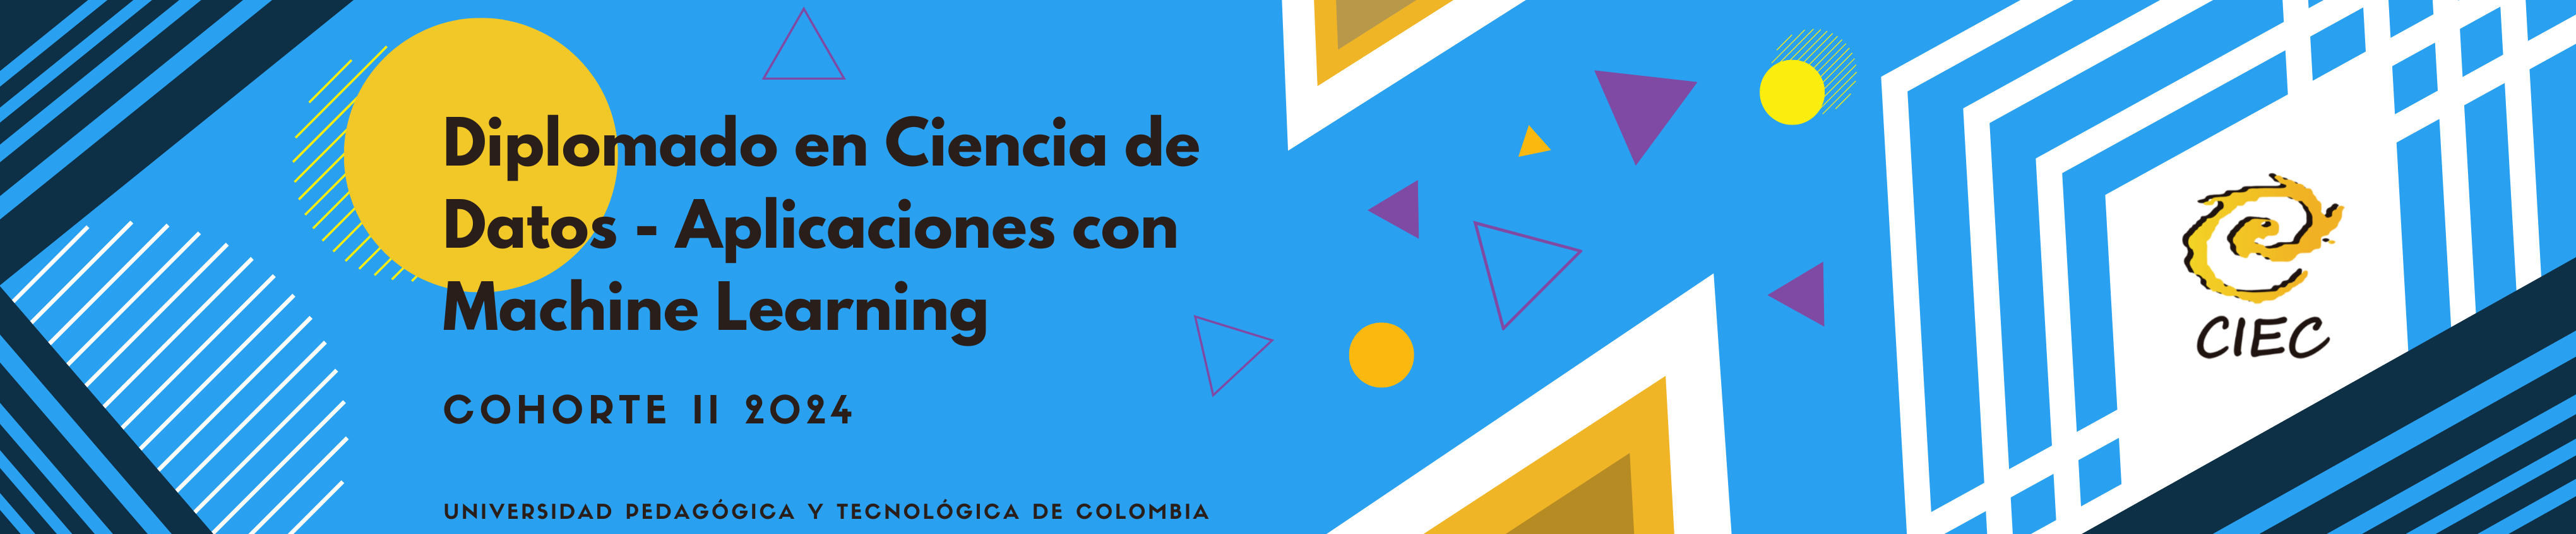


<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Machine Learning - Técnicas Avanzadas </h1>**


---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---

<!-- Table of Contents -->
**<h2 style="color: #007ACC;">Tabla de contenido</h2>**

- [<span style="color: #005C99;">1. Maldición de la Dimensionalidad</span>](#section1)
- [<span style="color: #005C99;">2. Mitigar la maldición de la dimensionalidad</span>](#section2)
- [<span style="color: #005C99;">3. Feature Engineering (Ingeniería de Características)</span>](#section3)
- [<span style="color: #005C99;">4. Seleccion de Modelos</span>](#section4)
- [<span style="color: #005C99;">5. Optimización de Hiperparámetros</span>](#section5)
- [<span style="color: #005C99;">6. Curvas de Validación</span>](#section6)
- [<span style="color: #005C99;">7. Métricas para Evaluación de Modelos</span>](#section7)


---

# <!-- Section 1 -->
**<h2 id="section1" style="color: #007ACC;">1. Maldición de la Dimensionalidad</h2>**


Entendamos el contexto sobre los desafíos que enfrentamos al trabajar con datos de alta dimensionalidad. He aquí la necesidad de seleccionar y transformar características.

### ¿Qué es la maldición de la dimensionalidad?

La «maldición de la dimensionalidad» se refiere a los fenómenos que se producen al clasificar, organizar y analizar datos de «alta dimensionalidad» que no se dan en espacios de «baja dimensionalidad», concretamente el problema de la «escasez de datos» y la «certidumbre de los datos».

### Problemas
La dispersión de datos se produce al pasar a dimensiones superiores. El `volumen del espacio representado crece tan rápido` que los datos no pueden mantenerse y, por tanto, se vuelven dispersos. El problema de la dispersión es importante para cualquier problema cuyo objetivo tenga cierta importancia estadística.

A medida que un espacio de datos pasa de una dimensión a dos dimensiones y luego a tres dimensiones, los datos dados ocupan cada vez menos espacio de datos. Para mantener una representación precisa del espacio, los datos para el análisis crecen exponencialmente.

El segundo problema que se plantea está relacionado con la clasificación de los datos. En espacios de baja dimensión, los datos pueden parecer muy similares, pero cuanto mayor es la dimensión, más alejados pueden parecer esos puntos de datos. Los dos aerogeneradores de abajo parecen muy cercanos en dos dimensiones, pero muy alejados cuando se ven en una tercera dimensión. Este es el mismo efecto que la maldición de la dimensionalidad tiene sobre los datos.

<img src='https://images.deepai.org/glossary-terms/curse-of-dimensionality-5166894.jpg'>

### Características infinitas requieren un entrenamiento infinito

Al crear redes neuronales, las instancias se crean con un cierto número de características (dimensiones). Cada característica tiene aspectos individuales, cada aspecto cae en algún lugar a lo largo de cada dimensión. En un ejemplo de clasificación de frutas, es posible que queramos una característica para el color, otra para el peso, otra para la forma, etc. Cada característica añade información, y si pudiéramos manejar todas las características posibles, podríamos saber perfectamente qué fruta estamos considerando. Sin embargo, un número infinito de características requiere un número infinito de ejemplos de entrenamiento, lo que elimina la utilidad de nuestra red en el mundo real.

Lo más desconcertante es que la cantidad de datos de entrenamiento necesarios aumenta exponencialmente con cada característica añadida. Incluso si sólo tuviéramos 15 características, cada una de las cuales es una pregunta «sí» o «no» sobre la fruta que estamos identificando.

# <!-- Section 2 -->
**<h2 id="section2" style="color: #007ACC;">2. Mitigar la maldición de la dimensionalidad</h2>**



La elección cuidadosa del número de dimensiones (características) que se van a utilizar es prerrogativa del científico de datos que entrena una red. En general, cuanto menor sea el tamaño del conjunto de entrenamiento, menos características se deben utilizar. Hay que tener en cuenta que cada característica aumenta exponencialmente los requisitos del conjunto de datos.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from mpl_toolkits.mplot3d import Axes3D
seed(42)

In [ ]:
i = 100 # Cantidad de data
sigma = 10
mu = 0
X = randn(i)*sigma+mu
y = randn(i)*sigma+mu
z = randn(i)*sigma+mu

---
1 Dimension

---

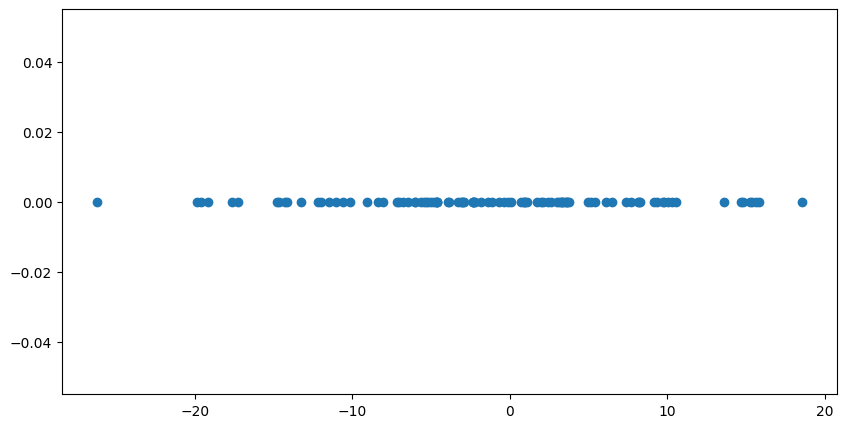

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, [0]*i);
plt.show()

---
2 Dimensions

---

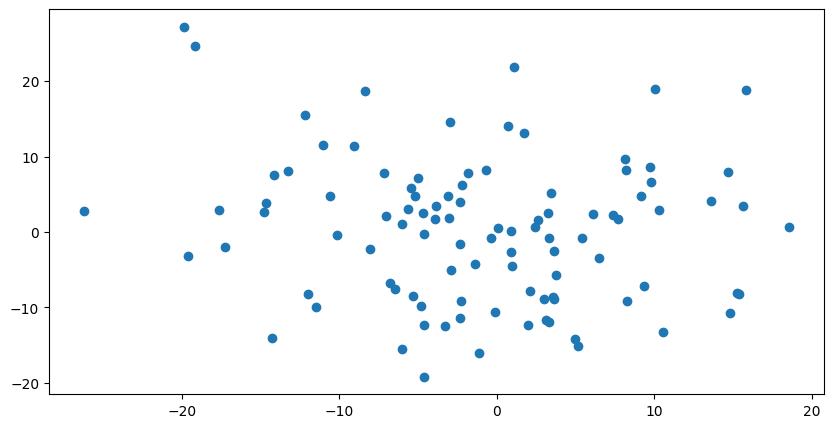

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, y);
plt.show()

---
3 Dimensions

---

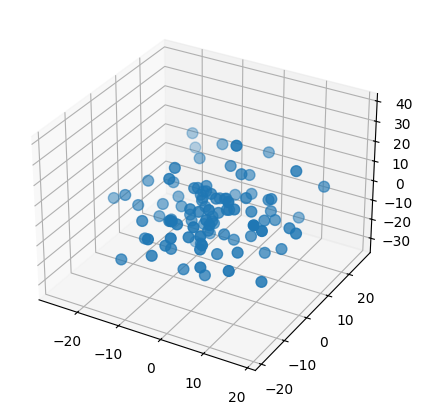

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X, y, z,s=60);
plt.show()

# <!-- Section 3 -->
**<h2 id="section3" style="color: #007ACC;">3. Feature Engineering (Ingeniería de Características)</h2>**


---
Definición y Aspectos Clave del Feature Engineering

---

## Definición de Feature Engineering

El _feature engineering_, o ingeniería de características, es el proceso de transformar y crear variables (características) a partir de datos en bruto para mejorar el rendimiento de un modelo de aprendizaje automático. Este proceso incluye técnicas para seleccionar, modificar, combinar y crear características que sean más representativas de los patrones en los datos, permitiendo al modelo hacer predicciones más precisas.

## Aspectos Clave del Feature Engineering

- **Selección de características:** Se refiere a identificar y elegir las características que mejor representen la información relevante en los datos y que tengan un impacto positivo en el rendimiento del modelo. Esto puede incluir la eliminación de características redundantes o irrelevantes.

- **Transformación de características:** Involucra aplicar transformaciones matemáticas o estadísticas a las características existentes, como normalización, escalado, codificación de variables categóricas, logaritmos, entre otros. Estas transformaciones ayudan a mejorar la interpretabilidad y efectividad del modelo.

- **Creación de nuevas características:** Este proceso, conocido como _feature extraction_, se enfoca en generar nuevas características a partir de combinaciones o transformaciones de las existentes. Por ejemplo, se pueden crear variables de interacción, agregaciones temporales o representar la información en el dominio de Fourier.

- **Ingeniería de características específicas de dominio:** Consiste en el diseño de características basadas en el conocimiento del dominio del problema. Este tipo de características suele capturar mejor las relaciones y patrones que son significativos en contextos específicos (por ejemplo, indicadores financieros en datos de economía o variables derivadas de GPS en análisis de trayectorias).

- **Reducción de dimensionalidad:** Cuando se dispone de un gran número de características, técnicas como _Principal Component Analysis_ (PCA) o _t-Distributed Stochastic Neighbor Embedding_ (t-SNE) pueden ayudar a reducir la cantidad de características manteniendo la mayor cantidad de información posible. Esto facilita el procesamiento y reduce el riesgo de sobreajuste en los modelos.

- **Codificación de características categóricas:** Dado que muchos algoritmos requieren características numéricas, las variables categóricas se deben transformar mediante técnicas como _One-Hot Encoding_ o _Target Encoding_, permitiendo así que el modelo interprete correctamente las relaciones entre los valores categóricos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
!gdown "1MwZZb2jRsFKeL8lgqSVn0cuv6eZztzR1"

movies = pd.read_csv('imdb_dataset.csv')
movies.head(10)

Downloading...
From: https://drive.google.com/uc?id=1MwZZb2jRsFKeL8lgqSVn0cuv6eZztzR1
To: /content/imdb_dataset.csv
100% 92.4k/92.4k [00:00<00:00, 16.0MB/s]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,NaN,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,NaN,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,NaN,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,NaN,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NaN,Drama,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195.0,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139.0,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


---
Valores nulos

---

In [ ]:
movies.isna().sum()

,0
star_rating,1
title,0
content_rating,1
genre,1
duration,19
actors_list,0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     978 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  978 non-null    object 
 3   genre           978 non-null    object 
 4   duration        960 non-null    float64
 5   actors_list     979 non-null    object 
dtypes: float64(2), object(4)
memory usage: 46.0+ KB


In [ ]:
print(movies.shape)
movies = movies.dropna(subset=['genre', 'duration'])
print(movies.shape)

(979, 6)
(959, 6)


In [ ]:
movies.isna().sum()

,0
star_rating,1
title,0
content_rating,1
genre,0
duration,0
actors_list,0


---
Valores atípicos - Outliers

---

Descubrir con Histograma

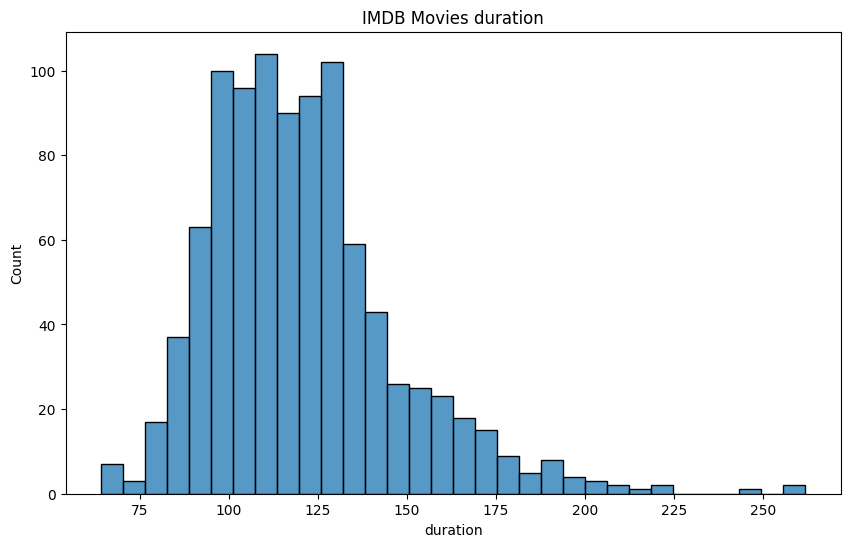

In [ ]:
sns.histplot(movies['duration']).set_title('IMDB Movies duration')
plt.show()

Descubrir con BoxPlot

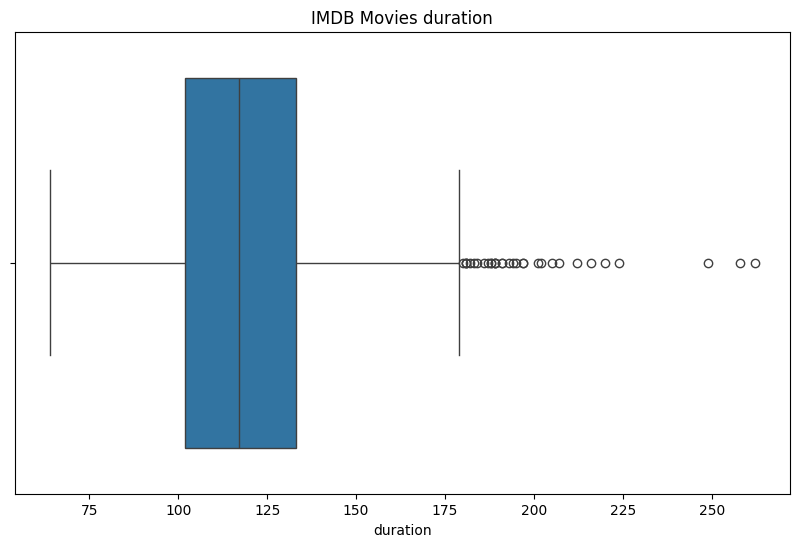

In [ ]:
sns.boxplot(data=movies, x='duration').set_title('IMDB Movies duration')
plt.show()

In [ ]:
q1 = np.percentile(movies['duration'], 25)
q3 = np.percentile(movies['duration'], 75)
iqr = q3 - q1

q3 + 1.5 * iqr

179.5

In [ ]:
mean = movies['duration'].mean()
std = movies['duration'].std()

movies['duration_sigmas'] = (movies['duration'] - mean) / std

In [ ]:
movies[
  (movies['duration_sigmas'] > 3) |
  (movies['duration_sigmas'] < -3)
]

,star_rating,title,content_rating,genre,duration,actors_list,duration_sigmas
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894
17,8.7,Seven Samurai,UNRATED,Drama,207.0,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...",3.265061
78,8.4,Once Upon a Time in America,R,Crime,249.0,"[u'Robert De Niro', u'James Woods', u'Elizabet...",4.855229
85,8.4,Lawrence of Arabia,PG,Adventure,216.0,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...",3.605811
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224.0,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",3.908700
157,8.2,Gone with the Wind,G,Drama,258.0,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...",5.195979
204,8.1,Ben-Hur,G,Adventure,212.0,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe...",3.454366
445,7.9,The Ten Commandments,APPROVED,Adventure,220.0,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...",3.757256
476,7.8,Hamlet,PG-13,Drama,262.0,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...",5.347424
630,7.7,Malcolm X,PG-13,Biography,202.0,"[u'Denzel Washington', u'Angela Bassett', u'De...",3.075755


---
Características categóricas

---

In [ ]:
movies[['title', 'genre']]

,title,genre
1,The Godfather,Crime
4,Pulp Fiction,Crime
5,12 Angry Men,Drama
6,"The Good, the Bad and the Ugly",Western
7,The Lord of the Rings: The Return of the King,Adventure
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


In [ ]:
movies.shape

(959, 7)

In [ ]:
movies_dummies = pd.get_dummies(movies, columns=['genre'])
movies_dummies.head()

,star_rating,title,content_rating,duration,actors_list,duration_sigmas,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_History,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_Thriller,genre_Western
1,NaN,The Godfather,R,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",2.053504,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.9,Pulp Fiction,R,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1.258419,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,8.9,12 Angry Men,NaN,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",-0.937527,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",1.523448,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,8.9,The Lord of the Rings: The Return of the King,PG-13,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


---
Feature Binning

---

In [ ]:
duration_bins = pd.cut(movies['duration'], bins=10)
duration_bins

,duration
1,"(163.0, 182.8]"
4,"(143.2, 163.0]"
5,"(83.8, 103.6]"
6,"(143.2, 163.0]"
7,"(182.8, 202.6]"
...,...
974,"(103.6, 123.4]"
975,"(103.6, 123.4]"
976,"(123.4, 143.2]"
977,"(103.6, 123.4]"


In [ ]:
duration_bins.value_counts()

,count
duration,
"(103.6, 123.4]",321
"(83.8, 103.6]",228
"(123.4, 143.2]",226
"(143.2, 163.0]",84
"(163.0, 182.8]",41
"(63.802, 83.8]",32
"(182.8, 202.6]",18
"(202.6, 222.4]",5
"(242.2, 262.0]",3


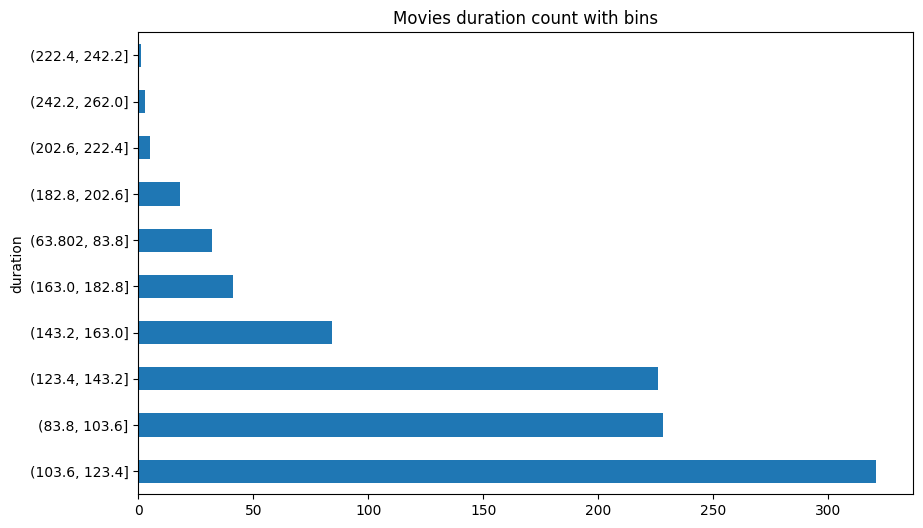

In [ ]:
duration_bins.value_counts().plot(kind='barh').set_title('Movies duration count with bins')
plt.show()

---
Normalización de características

---

Min-Max Scaling

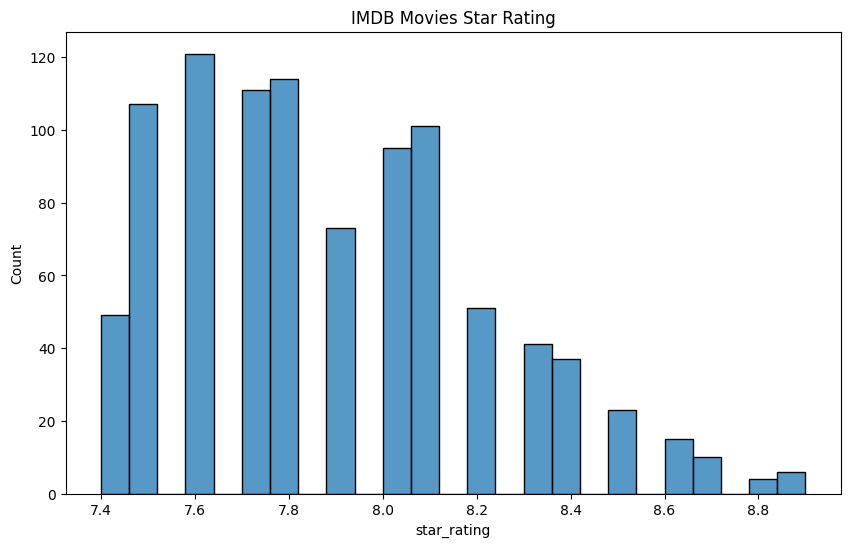

In [ ]:
sns.histplot(movies['star_rating'], bins=25).set_title('IMDB Movies Star Rating')
plt.show()

In [ ]:
# definir el escalador y ajustarlo
mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=False)
mm_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

MinMaxScaler()

In [ ]:
# transformarÇ movies['star_rating']
movies['star_rating_min-max'] = mm_scaler.transform(movies['star_rating'].values.reshape(-1, 1))

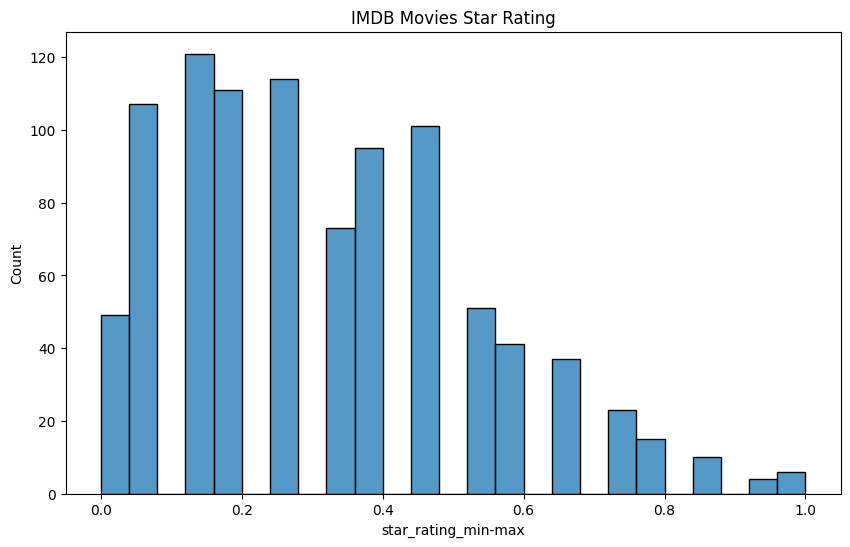

In [ ]:
sns.histplot(movies['star_rating_min-max'], bins=25).set_title('IMDB Movies Star Rating')
plt.show()

Almacenar en disco

In [ ]:
import pickle

# Escribir con pickle
with open("mm_scaler.pkl", "wb") as f:
  pickle.dump(mm_scaler, f)

# Cargar desde disk
with open("mm_scaler.pkl", "rb") as f:
  mm_scaler_loaded = pickle.load(f)


In [ ]:
# Probar ambos objetos da los mismos resultados
print(mm_scaler_loaded.transform([[7.8]]))
print(mm_scaler.transform([[7.8]]))

[[0.26666667]]
[[0.26666667]]


Podemos ver que los datos tienen la misma distribución.

Ahora bien, ¿qué ocurre si intentamos escalar valores de datos que están fuera de nuestra distribución muestral pero siguen siendo valores válidos?

In [ ]:
mm_scaler.transform([[3]])

array([[-2.93333333]])

In [ ]:
mm_scaler.transform([[5]])

array([[-1.6]])

In [ ]:
mm_scaler.transform([[9.3]])

array([[1.26666667]])

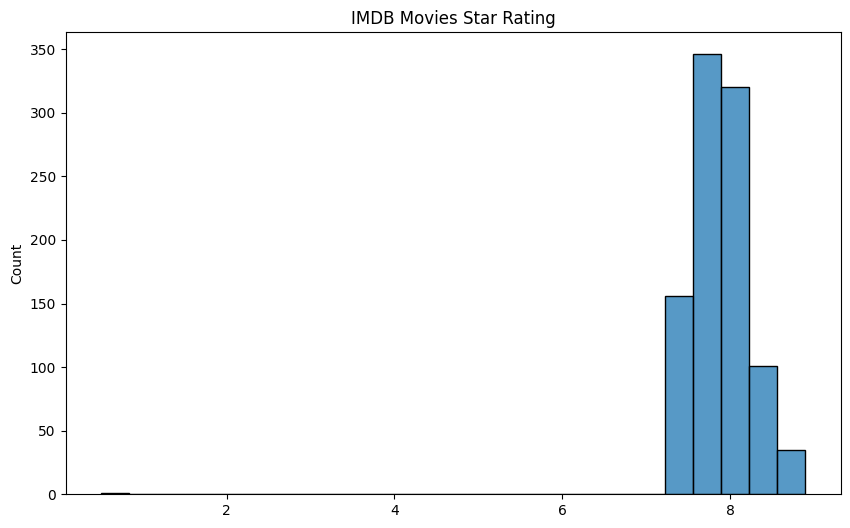

In [ ]:
new_star_rating = movies['star_rating'].tolist()
new_star_rating.append(0.5)

sns.histplot(new_star_rating, bins=25).set_title('IMDB Movies Star Rating')
plt.show()

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
new_star_rating_mm = mm_scaler.fit_transform(np.array(new_star_rating).reshape(-1, 1))

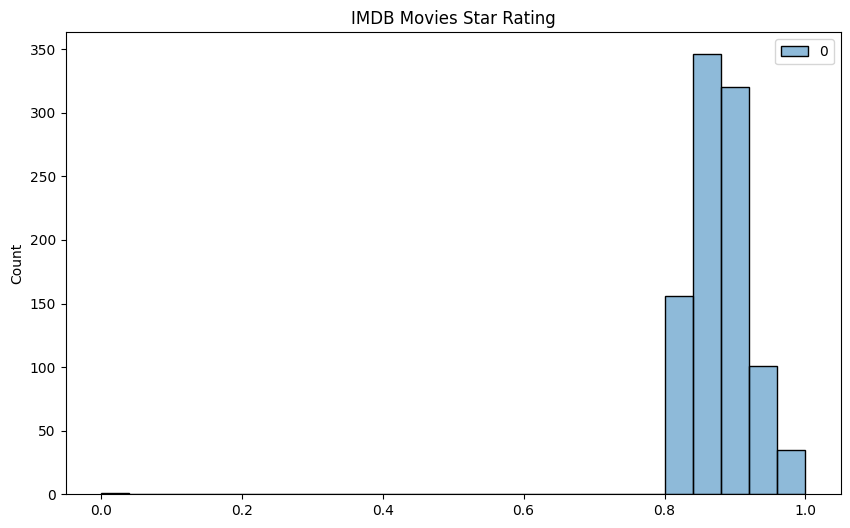

In [ ]:
sns.histplot(new_star_rating_mm, bins=25).set_title('IMDB Movies Star Rating')
plt.show()

# <!-- Section 4 -->
**<h2 id="section4" style="color: #007ACC;">4. Seleccion de Modelos</h2>**



Definimos datos de juguete:

In [ ]:
X = np.array([[2, 2,4], [3, 4, 1], [1, 2, 4], [3, 4, 2], [3, 2, 2], [3, 1, 2], [1, 4, 2], [1, 1, 3]])
X

array([[2, 2, 4],
       [3, 4, 1],
       [1, 2, 4],
       [3, 4, 2],
       [3, 2, 2],
       [3, 1, 2],
       [1, 4, 2],
       [1, 1, 3]])

Con la siguientes etiquetas:

In [ ]:
y = np.array(("a","a","a","a","a","b","b","b"))
y

array(['a', 'a', 'a', 'a', 'a', 'b', 'b', 'b'], dtype='<U1')

---
Validación Cruzada

---

- [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

Podemos usar [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) para hacer cross-validation:

In [ ]:
from sklearn.model_selection import KFold
KFold??
kf = KFold(n_splits=4, shuffle=True, random_state=0)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(f"TRAIN: {train_index} VAL: {val_index} {y_val}")

    #model.fit(X_train, y_train)
    #model.predict(X_val)

TRAIN: [0 1 3 4 5 7] VAL: [2 6] ['a' 'b']
TRAIN: [0 2 3 4 5 6] VAL: [1 7] ['a' 'b']
TRAIN: [1 2 4 5 6 7] VAL: [0 3] ['a' 'a']
TRAIN: [0 1 2 3 6 7] VAL: [4 5] ['a' 'b']


---
División K-Fold Estratificada

---

Para que la división sea estratificada, usamos [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html):

In [ ]:
from sklearn.model_selection import StratifiedKFold
StratifiedKFold??
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(f"TRAIN: {train_index} VAL: {val_index} {y_val}")

    #model.fit(X_train, y_train)
    #model.predict(X_val)

TRAIN: [0 1 3 6 7] VAL: [2 4 5] ['a' 'a' 'b']
TRAIN: [1 2 4 5 7] VAL: [0 3 6] ['a' 'a' 'b']
TRAIN: [0 2 3 4 5 6] VAL: [1 7] ['a' 'b']


---
Búsqueda en Grilla (Grid Search)

---

- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)

Grilla de Parámetros

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier??

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
}

Podemos listar todas las combinaciones para usarlas a mano con [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html):

In [ ]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = DecisionTreeClassifier(**params, random_state=0)
    #model.fit(...)
    #model.predict(...)

{'criterion': 'gini', 'max_depth': 1}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 1}
{'criterion': 'entropy', 'max_depth': 2}


---
Grilla de Parámetros + Validación Cruzada

---

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) nos sirve para hacer validación cruzada sobre una grilla de parámetros. Sklearn se encarga de todo el proceso y nos devuelve una tabla de resultados y el mejor clasificador obtenido.

La búsqueda se puede configurar de varias maneras. Por defecto la validación cruzada es estratificada.

- [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter9)

In [ ]:
from sklearn.model_selection import GridSearchCV
GridSearchCV??
model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y);
cv.fit??

In [ ]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	| mean	std	rank
gini	1	| 0.67	0.27	3
gini	2	| 0.78	0.16	1
entropy	1	| 0.67	0.27	3
entropy	2	| 0.78	0.16	1


In [ ]:
import pandas as pd
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]
#df

,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,1,0.666667,0.272166,3
1,gini,2,0.777778,0.157135,1
2,entropy,1,0.666667,0.272166,3
3,entropy,2,0.777778,0.157135,1


In [ ]:
best_model = cv.best_estimator_

In [ ]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 2}

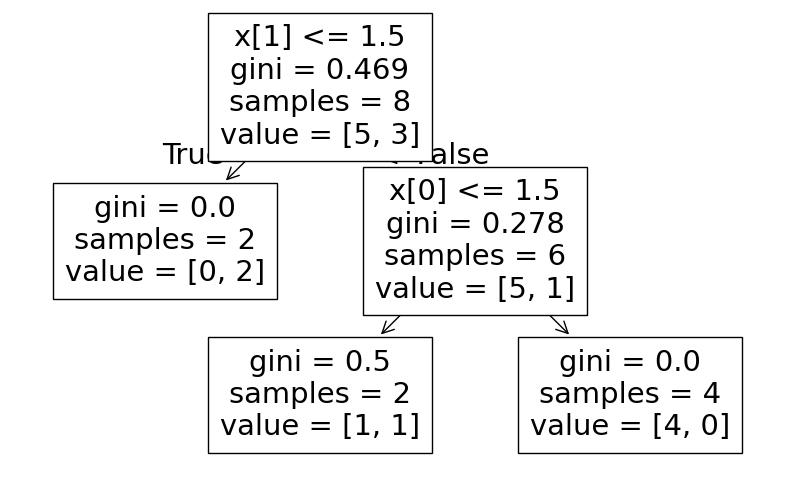

In [ ]:
from sklearn.tree import plot_tree

plot_tree(best_model);

Podemos inspeccionar las clases:

In [ ]:
best_model.classes_

array(['a', 'b'], dtype='<U1')

Podemos realizar una predicción con el mejor modelo encontrado:

In [ ]:
best_model.predict([[1,1,2]])

array(['b'], dtype='<U1')

---
Búsqueda Aleatoria

---

- [Randomized Parameter Optimization](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDClassifier??

In [ ]:
model = SGDClassifier(random_state=0)

In [ ]:
from scipy.stats import loguniform

param_dist = {
    'loss': [
        'hinge',        # SVM
        'log_loss',     # Logistic Regression
        # 'perceptron', # Perceptron (not supported)
    ],
    'alpha': loguniform(1e-4, 1e2),  # de 0.0001 a 100.0
}

Al parámetro alpha lo va a obtener desde muestras de una función de probabilidad tipo loguniform:

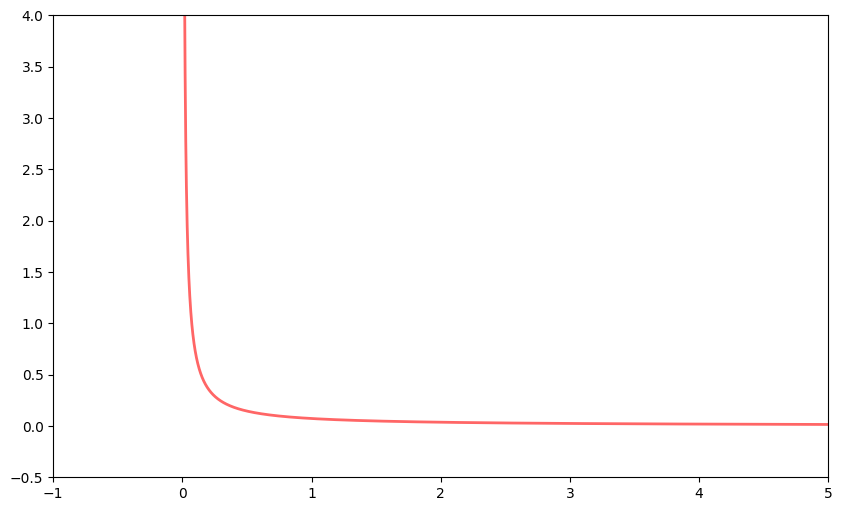

In [ ]:
from scipy.stats import loguniform

import matplotlib.pyplot as plt
a= 1e-4
b=100
fig, ax = plt.subplots(1, 1)
x = np.linspace(a, b, 100000)
plt.xlim(-1, 5)
plt.ylim(-0.50,4)
ax.plot(x, loguniform.pdf(x, a, b), 'r-', lw=2, alpha=0.6, label='loguniform pdf')

Podemos muestrear mano con [ParameterSampler](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterSampler.html):

In [ ]:
from sklearn.model_selection import ParameterSampler

for params in ParameterSampler(param_dist, 10, random_state=0):
    print(params)
    model = SGDClassifier(**params, random_state=0)
    #model.fit(...)
    #model.predict(...)

{'alpha': 0.19628224813442816, 'loss': 'log_loss'}
{'alpha': 11.630395714480311, 'loss': 'log_loss'}
{'alpha': 0.1859084363016964, 'loss': 'log_loss'}
{'alpha': 0.5512926225087429, 'loss': 'hinge'}
{'alpha': 0.042220489831498315, 'loss': 'hinge'}
{'alpha': 0.00021891618132748294, 'loss': 'hinge'}
{'alpha': 0.019982467392329464, 'loss': 'hinge'}
{'alpha': 7.46470024356059, 'loss': 'hinge'}
{'alpha': 0.2560161525002872, 'loss': 'log_loss'}
{'alpha': 10.386580256500284, 'loss': 'hinge'}


---
Búsqueda Aleatoria + Validación Cruzada

---

También podemos dejar que Sklearn se encargue de todo con [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html):


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = SGDClassifier(random_state=0)

cv = RandomizedSearchCV(model, param_dist, n_iter=10, cv=3, random_state=0)
cv.fit(X, y);

In [ ]:
import pandas as pd
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,mean_test_score,std_test_score,rank_test_score
0,log_loss,0.196282,0.611111,0.078567,1
1,log_loss,11.630396,0.611111,0.078567,1
2,log_loss,0.185908,0.611111,0.078567,1
3,hinge,0.551293,0.611111,0.078567,1
4,hinge,0.042220,0.611111,0.078567,1
5,hinge,0.000219,0.611111,0.078567,1
6,hinge,0.019982,0.611111,0.078567,1
7,hinge,7.464700,0.611111,0.078567,1
8,log_loss,0.256016,0.611111,0.078567,1
9,hinge,10.386580,0.611111,0.078567,1


In [ ]:
cv.best_estimator_

SGDClassifier(alpha=0.19628224813442816, loss='log_loss', random_state=0)

In [ ]:
cv.best_params_

{'alpha': 0.19628224813442816, 'loss': 'log_loss'}

## Referencias


Scikit-learn:

- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

# <!-- Section 5 -->
**<h2 id="section5" style="color: #007ACC;">5. Optimización de Hiperparámetros</h2>**


In [ ]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
df = pd.DataFrame(
    np.c_[data['data'], data['target']],
    columns= np.append(data['feature_names'], ['target'])
)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
df.target.value_counts()

,count
target,
1.0,357
0.0,212


In [ ]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [ ]:
data = df[features_mean + ['target']]
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


In [ ]:
X = data.drop(['target'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
KNeighborsClassifier?

Hay tres opciones posibles para realizar la optimización de hiperparámetros:
* Manual.
* Búsqueda en cuadrícula.
* Búsqueda aleatoria.
    
La búsqueda manual puede ser muy tediosa e ineficiente, por lo que vamos a probar las otras dos: **aleatoria** y por **rejilla**. Además, ya tenemos una idea del rendimiento de estos modelos en este conjunto de datos del encuentro anterior.



---
Búsqueda por cuadrícula

---

In [ ]:
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 3, 5, 7, 10],
    'algorithm': ['auto', 'kd_tree']
}

In [ ]:
# Estrategia 1: Grid Search + CV
model_grid = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)
model_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

**¿Pero cómo elijo la mejor configuración? ¿Cuál es el mejor rendimiento? ¿Y el resto de resultados?**

**Pista:** La respuesta correcta siempre se encuentra en la documentación.

Hay 3 atributos del modelo (clase de la librería sklearn) que nos ayudarán a responder estas preguntas: `best_params_`, `best_score_` y `cv_results_`.

**Para investigar:** Antes de seguir ejecutando notebbok, lee un poco más sobre la documentación en general de [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [`RandomizedSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) y en particular sobre los 3 atributos que acabamos de mencionar.

In [ ]:
print("Best params: "+str(model_grid.best_params_))
print("Best Score: "+str(model_grid.best_score_)+'\n')

scores = pd.DataFrame(model_grid.cv_results_)
scores

Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8857142857142858



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010958,0.005991,0.027333,0.008949,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,341
1,0.013113,0.006878,0.017952,0.008955,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,341
2,0.016416,0.007257,0.054533,0.011001,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.857143,0.824176,0.835165,0.879121,0.813187,0.841758,0.023671,371
3,0.019316,0.006329,0.017439,0.001850,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,341
4,0.010529,0.002862,0.033442,0.006122,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.890110,0.846154,0.934066,0.824176,0.868132,0.872527,0.037812,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.008348,0.003645,0.010146,0.004857,kd_tree,10,17,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.890110,0.879121,0.923077,0.846154,0.868132,0.881319,0.025441,101
376,0.007426,0.003430,0.029840,0.002636,kd_tree,10,18,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.901099,0.868132,0.934066,0.835165,0.857143,0.879121,0.034750,121
377,0.009153,0.002782,0.011697,0.004774,kd_tree,10,18,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.901099,0.879121,0.923077,0.846154,0.868132,0.883516,0.026556,21
378,0.005383,0.002287,0.028882,0.004363,kd_tree,10,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.901099,0.868132,0.934066,0.835165,0.857143,0.879121,0.034750,121


En este DataFrame están todos los resultados devueltos por `GridSearchCV()`. Hay mucha información para explorar, pero repasa las siguientes celdas antes de hacerlo.

Ya hemos leído la documentación y por lo tanto ya sabemos que podemos predecir con el mejor modelo de la siguiente manera:

In [ ]:
prediction = model_grid.predict(X_test)

Confusion Matrix:


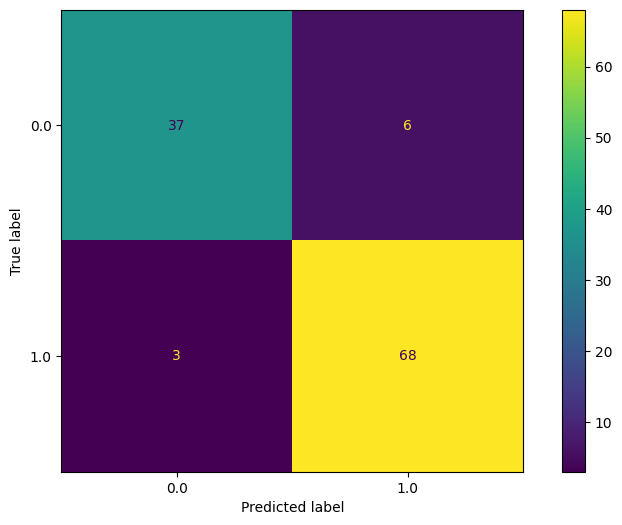

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_grid, X_test, y_test)
print("Confusion Matrix:")

---
Búsqueda aleatoria

---

La metodología es muy similar. La principal diferencia es que, para crear la rejilla, ya no tenemos que pasar valores para los hiperparámetros, sino un generador aleatorio para cada atributo, en aquellos atributos que queramos que explore aleatoriamente.

In [ ]:
param_dist = {
    'n_neighbors': sp.stats.randint(1, 20),
    'weights': ['uniform', 'distance'],
    'leaf_size': sp.stats.randint(1, 10),
    'algorithm': ['auto', 'kd_tree']
}

In [ ]:
help(sp.stats.randint)

Help on randint_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.randint_gen object>
    A uniform discrete random variable.
    
    As an instance of the `rv_discrete` class, `randint` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(low, high, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, low, high, loc=0)
        Probability mass function.
    logpmf(k, low, high, loc=0)
        Log of the probability mass function.
    cdf(k, low, high, loc=0)
        Cumulative distribution function.
    logcdf(k, low, high, loc=0)
        Log of the cumulative distribution function.
    sf(k, low, high, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, low, high, loc=0)
        Log of the survival function.
    ppf(q, low, high

In [ ]:
# Estrategia 2: Búsqueda aleatoria + CV
model_random = RandomizedSearchCV(knn, param_dist, n_iter=100, random_state=0, cv=5, n_jobs=-1)
model_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c40721807f0>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c4072181ae0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [ ]:
print("Best params: "+str(model_random.best_params_))
print("Best Score: "+str(model_random.best_score_)+'\n')

scores = pd.DataFrame(model_random.cv_results_)
scores

Best params: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 16, 'weights': 'distance'}
Best Score: 0.8857142857142858



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012948,0.006066,0.018918,0.009235,auto,6,1,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,88
1,0.016647,0.006216,0.020208,0.007603,kd_tree,4,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_ne...",0.890110,0.879121,0.923077,0.846154,0.879121,0.883516,0.024670,8
2,0.018065,0.005945,0.051473,0.013996,kd_tree,6,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_ne...",0.901099,0.868132,0.934066,0.835165,0.857143,0.879121,0.034750,35
3,0.013262,0.001810,0.035819,0.012232,kd_tree,7,13,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.890110,0.868132,0.934066,0.835165,0.857143,0.876923,0.033620,56
4,0.010596,0.005928,0.010494,0.007868,kd_tree,7,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.890110,0.879121,0.923077,0.846154,0.879121,0.883516,0.024670,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004567,0.001261,0.005868,0.002595,auto,6,12,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.901099,0.868132,0.923077,0.846154,0.879121,0.883516,0.026556,8
96,0.005186,0.001699,0.004980,0.000186,auto,3,14,distance,"{'algorithm': 'auto', 'leaf_size': 3, 'n_neigh...",0.901099,0.879121,0.923077,0.846154,0.868132,0.883516,0.026556,8
97,0.004417,0.000342,0.004739,0.000144,kd_tree,7,11,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.890110,0.868132,0.923077,0.846154,0.868132,0.879121,0.026005,35
98,0.004873,0.000228,0.016860,0.006623,auto,1,4,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.857143,0.846154,0.912088,0.780220,0.846154,0.848352,0.041931,84


In [ ]:
prediction = model_random.predict(X_test)

Confusion Matrix:


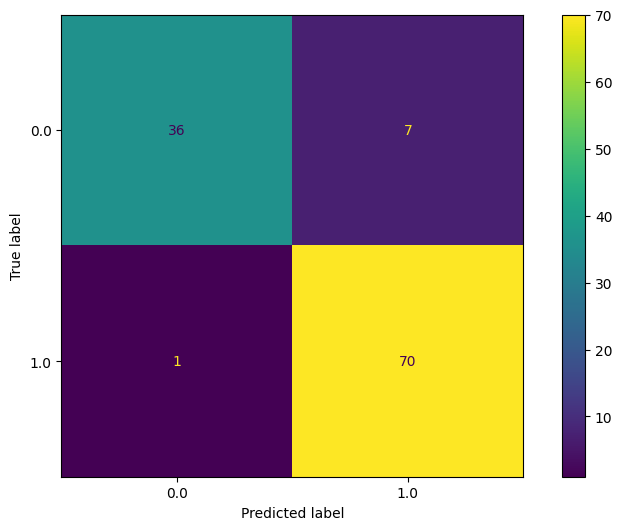

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_random, X_test, y_test)
print("Confusion Matrix:")

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        43
         1.0       0.91      0.99      0.95        71

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114




# <!-- Section 6 -->
**<h2 id="section6" style="color: #007ACC;">6. Curvas de Validación</h2>**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
sns.set_theme()

scores_train = []
scores_test = []
depths = np.arange(1, 10)

for max_depth in depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train.append(accuracy_score(y_train, y_pred_train))
    scores_test.append(accuracy_score(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

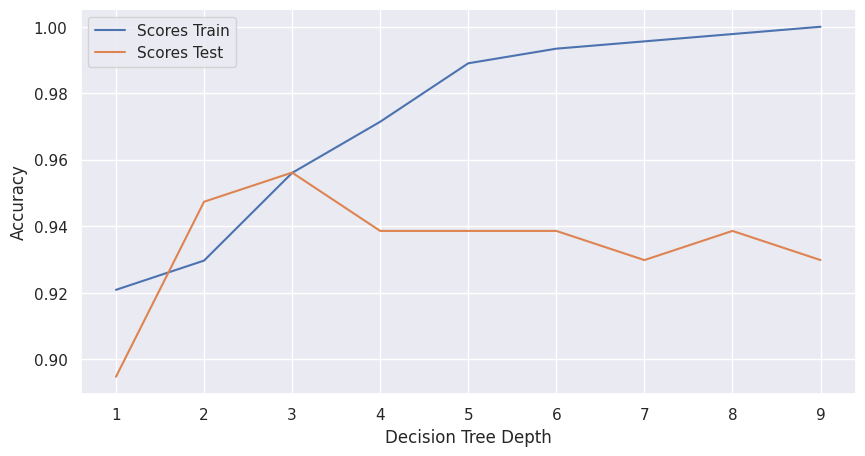

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(depths, scores_train, label='Scores Train')
plt.plot(depths, scores_test, label='Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Decision Tree Depth')
plt.show()

---
Curvas de validación + CV
---

In [ ]:
from sklearn.model_selection import cross_validate

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

depths = np.arange(1, 10, 1)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)

    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())

    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

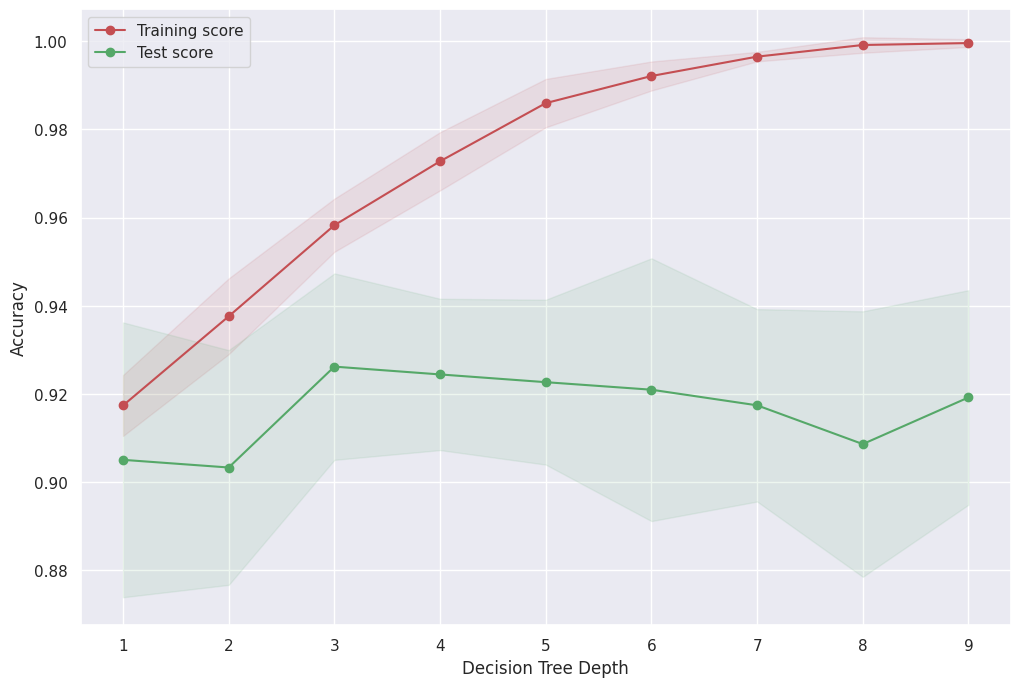

In [ ]:
plt.figure(figsize=(12, 8))
plt.fill_between(
    depths,
    tree_train_scores_mean - tree_train_scores_std,
    tree_train_scores_mean + tree_train_scores_std,
    alpha=0.1,
    color="r"
)
plt.fill_between(
    depths,
    tree_test_scores_mean - tree_test_scores_std,
    tree_test_scores_mean + tree_test_scores_std,
    alpha=0.1,
    color="g"
)
plt.plot(
    depths,
    tree_train_scores_mean,
    'o-', color="r",
    label="Training score"
)
plt.plot(
    depths,
    tree_test_scores_mean,
    'o-', color="g",
    label="Test score"
)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Decision Tree Depth')
plt.show()

# <!-- Section 7 -->
**<h2 id="section7" style="color: #007ACC;">7. Métricas para Evaluación de Modelos</h2>**

1. Crear datos ficticios para la clasificación
2. Clasificar datos ficticios
3. Desglose de las métricas incluidas en el informe de clasificación

---
Crear datos ficticios para la clasificación

---

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs, load_iris
from sklearn.model_selection import train_test_split


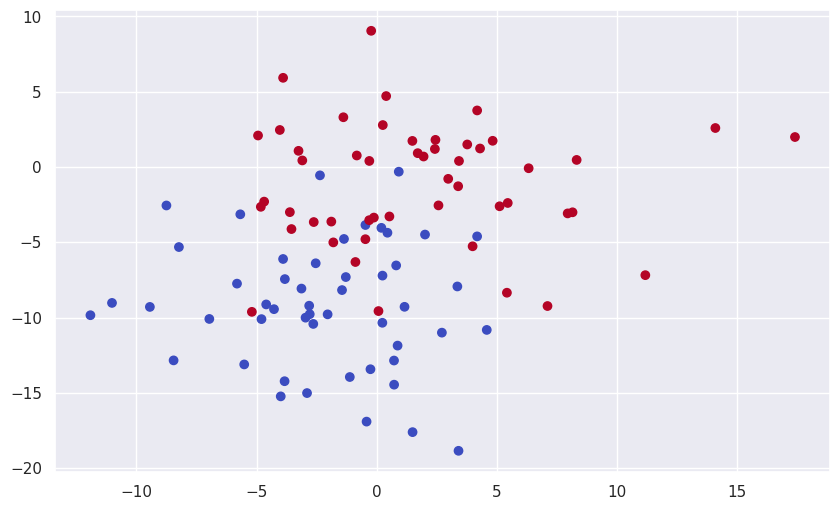

In [ ]:
data, labels = make_blobs(n_samples=100, n_features=2, centers=2,cluster_std=4,random_state=2)

plt.scatter(data[:,0], data[:,1], c = labels, cmap='coolwarm');

---
Clasificar datos

---

In [ ]:
#Importar LinearSVC
from sklearn.svm import LinearSVC

X_train = data[:70]
y_train = labels[:70]
X_test = data[70:]
y_test = labels[70:]

#Crear instancia de Support Vector Classifier
svc = LinearSVC()

#Ajustar estimador al 70% de los datos
svc.fit(X_train, y_train)

#Predecir final 30%
y_pred = svc.predict(X_test)

#Establecer los valores y verdaderos
y_true = y_test

---
Metricas

---

---
Accuracy

---

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy score: {}".format(accuracy_score(y_true, y_pred)))

Accuracy score: 0.9


---
Precision Score

---

TP - True Positives<br>
FP - False Positives<br>

Precision - Predicción de positivos.<br>
Precision = TP/(TP + FP)

In [ ]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_true, y_pred)))

Precision score: 0.9285714285714286


#### Recall Score

FN - False Negatives<br>

Recall (aka sensitivity or true positive rate): Fracción de positivos identificados correctamente.<br>
Recall = TP/(TP+FN)

In [ ]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_true, y_pred)))

Recall score: 0.8666666666666667


---
F1 Score

---

F1 Score (aka F-Score or F-Measure) - Una métrica útil para comparar dos clasificadores. La puntuación F1 tiene en cuenta la precisión y la recuperación. Se obtiene hallando la media armónica de la precisión y la recuperación.

F1 = 2 x (precision x recall)/(precision + recall)

In [ ]:
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_true, y_pred)))

F1 Score: 0.896551724137931


In [ ]:
f1_score??

---
Informe de clasificación

---

Informe que incluye Precision, Recall y F1-Score.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



---
Matriz de confusión

---

La matriz de confusión le permite ver usted mismo los ejemplos concretos clasificados erróneamente y realizar los cálculos adicionales que desee.

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Crear instancia de Support Vector Classifier
svc = LinearSVC(C=1000)

#Estimador de ajuste al 80% de los datos
svc.fit(X_train, y_train)

#Predecir final 20%
y_pred = svc.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cm

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.3       , 0.        ],
       [0.        , 0.        , 0.36666667]])

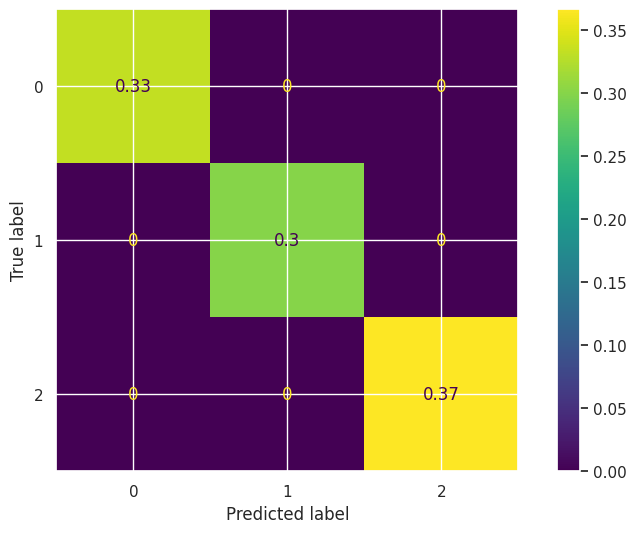

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---